1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

183.12


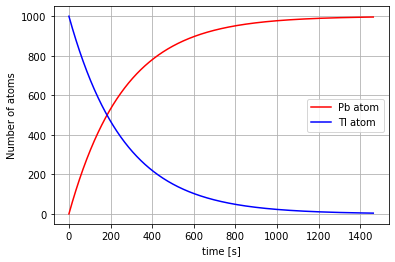

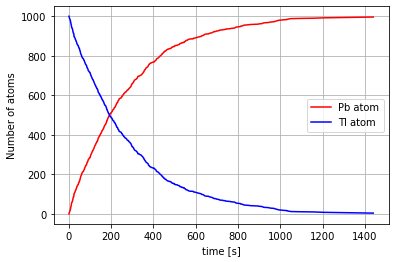

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

tau = (3.052 * 60)
print(tau)

def p(t):
    return 1 - 2**(-t/tau)

def pinverse(u):
    return (-tau * math.log(1 - u) / math.log(2))

N=int(8.0*tau)
tl = 1000 * np.ones(N)
lead = 1000 * np.array([p(i) for i in range(N)])
tl = tl - lead
time_axis = range(N)

plt.figure()
plt.plot(time_axis, lead, c='red')
plt.plot(time_axis, tl, c='blue')
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('Number of atoms')
plt.legend(['Pb atom', 'Tl atom'])
plt.show()

Nsamples=1000
u = np.random.random(Nsamples)
times=np.array([pinverse(uvalue) for uvalue in u])
tl = 1000 * np.ones(Nsamples)
times_sorted=np.sort(times)
lead_sample=np.array(range(Nsamples))
plot_times=times_sorted[times_sorted <= N]
Ntoplot=plot_times.shape[0]
plt.plot(times_sorted[0:Ntoplot], lead_sample[0:Ntoplot], c='red')
plt.plot(times_sorted[0:Ntoplot], tl[0:Ntoplot] - lead_sample[0:Ntoplot], c='blue')

plt.grid()
plt.xlabel('time [s]')
plt.ylabel('Number of atoms')
plt.legend(['Pb atom', 'Tl atom'])
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

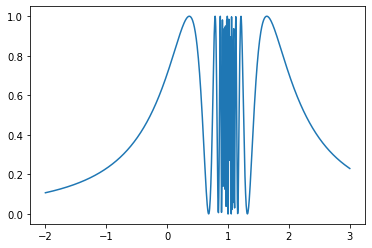

"Hit-miss" Monte Carlo estimate: 1.3533199999999999
"Hit-miss" Monte Carlo estimate relative error: 0.028486094853454335
Mean-Value Monte Carlo estimate: 1.3454747449604896
Mean-Value Monte Carlo estimate relative error: 0.019666275142082707

Comparing the two methods it seems that in this case the mean-value estimate performs better than hit-miss estimate
True value computed via WolframAlpha is approximately: 1.34961


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (np.sin(1/(1-x)))**2

# plotting the function
x = np.linspace(-2, 3, 1000)
plt.plot(x, f(x))
plt.show()

# Monte Carlo integration
def monteCarloHitMissIntegral(AreaBox, xWidth, func, NumSamples):
    k = 0
    for i in range(NumSamples):
        x = xWidth*np.random.random()
        y = np.random.random()
        if y < func(x):
            k += 1
    #Get the "Hit-miss" Monte Carlo estimate:
    I = AreaBox * k / NumSamples
    return I


def monteCarloMeanValueIntegral(a, b, func, NumSamples):
    sumVal = 0
    for i in range(NumSamples):
        x = a + (b - a) * np.random.random()
        sumVal += func(x)
    #Get the "Hit-miss" Monte Carlo estimate:
    I = (b - a) * sumVal / NumSamples
    return I

NTrials=100
A = 2
xWidth = 2
NumSamples = 1000
I_distributionHitMiss = np.zeros((NTrials,))
for i in range(NTrials):
    x = 2*np.random.random()
    y = np.random.random()
    I_distributionHitMiss[i] = monteCarloHitMissIntegral(A, xWidth, f, NumSamples)

Imean = np.mean(I_distributionHitMiss)
Istd = np.std(I_distributionHitMiss)

print('"Hit-miss" Monte Carlo estimate:', Imean)
print('"Hit-miss" Monte Carlo estimate relative error:', Istd)

a = 0
b = 2
I_distributionMeanValue = np.zeros((NTrials,))
for i in range(NTrials):
    x = 2*np.random.random()
    y = np.random.random()
    I_distributionMeanValue[i] = monteCarloMeanValueIntegral(a, b, f, NumSamples)

Imean = np.mean(I_distributionMeanValue)
Istd = np.std(I_distributionMeanValue)



print('Mean-Value Monte Carlo estimate:', Imean)
print('Mean-Value Monte Carlo estimate relative error:', Istd)

print()
print('Comparing the two methods it seems that in this case the mean-value estimate performs better than hit-miss estimate')
print("True value computed via WolframAlpha is approximately:", 1.34961)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [10]:
from random import random

N = 1000000
A = 0
for i in range(N):
    x = random()
    y = random()
    if x**2 + y**2 <= 1:
        A += 1
print('integral value:', math.pi)
print('estimated integral value:', (4*A)/N)

A = 0
x = np.zeros(10)
for i in range(N):
    for j in range(10):
        x[j] = random()
    if np.linalg.norm(x) <= 1:
        A += 1
print('integral value:', math.pi**5/120)
print('estimated integral value:', (2**10 *A)/N)

integral value: 3.141592653589793
estimated integral value: 3.142844
integral value: 2.550164039877345
estimated integral value: 2.5344


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [11]:
import math

def g(x):
    return 1.0/(1.0 + math.exp(x))

N = 1000000
x = np.random.random(size=N)
#the inverse of the cumulative probability function is x^2
y = np.array([g(xval**2) for xval in x])
s = np.sum(y) / N

# Integral in interval [0,1] of w(x) is 2
I = 2.0*s
print(I)

0.8387402415987023
